In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("energy_consumption_dataset_950.csv")
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,Night,Fri,25.365429
1,38.767858,69.902200,0.078444,1,Afternoon,Thu,37.330928
2,33.299849,40.522277,11.414861,2,Afternoon,Sat,29.352114
3,29.966462,84.864717,0.529670,1,Morning,Fri,34.962693
4,18.900466,55.126231,11.186007,4,Evening,Wed,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,Morning,Tue,20.466653
946,18.422141,66.959127,11.813236,7,Evening,Sat,23.335067
947,37.500466,41.281484,3.765021,5,Morning,Sat,36.134230
948,36.847252,51.323074,8.461110,3,Morning,Mon,37.149819


In [ ]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,3,0,25.365429
1,38.767858,69.902200,0.078444,1,0,4,37.330928
2,33.299849,40.522277,11.414861,2,0,2,29.352114
3,29.966462,84.864717,0.529670,1,2,0,34.962693
4,18.900466,55.126231,11.186007,4,1,6,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,2,5,20.466653
946,18.422141,66.959127,11.813236,7,1,2,23.335067
947,37.500466,41.281484,3.765021,5,2,2,36.134230
948,36.847252,51.323074,8.461110,3,2,1,37.149819


In [ ]:
x=df.drop("energy_consumption",axis=1) #features
y=df["energy_consumption"] # target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
y_pred=model.predict(x_test)
y_pred

array([33.47204886, 21.45106065, 31.5504179 , 27.92048599, 24.3929822 ,
       26.78025949, 29.19729243, 25.45443204, 32.48079641, 31.76222968,
       27.92107725, 25.69056666, 24.30859435, 37.33843832, 30.36280214,
       33.47204886, 40.40729001, 24.12805068, 34.27006576, 34.60135586,
       38.88811254, 33.35233947, 29.44793462, 33.01485053, 27.46360893,
       21.65792864, 31.68211859, 25.31146263, 37.4940741 , 32.64416103,
       20.34800994, 33.63454151, 34.3342862 , 28.47738219, 37.54476837,
       24.40873254, 21.65792864, 36.02521778, 22.17807081, 37.10258466,
       29.07270091, 34.76307024, 32.02461729, 23.38774271, 35.986265  ,
       19.24320567, 25.46226896, 23.54086247, 36.04059509, 34.60135586,
       21.88414982, 29.93591118, 39.23594159, 37.37372391, 22.95310641,
       28.33000119, 22.99735468, 23.09536369, 25.72155225, 21.40033667,
       32.02461729, 37.35352775, 27.72901739, 25.7235098 , 38.88811254,
       25.69056666, 31.50525569, 34.7430739 , 24.50602853, 29.07

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:7.854037553417797
Root Mean Squared Error:2.802505584903944


In [ ]:
score=r2_score(y_test,y_pred)
score

0.8070745726747901

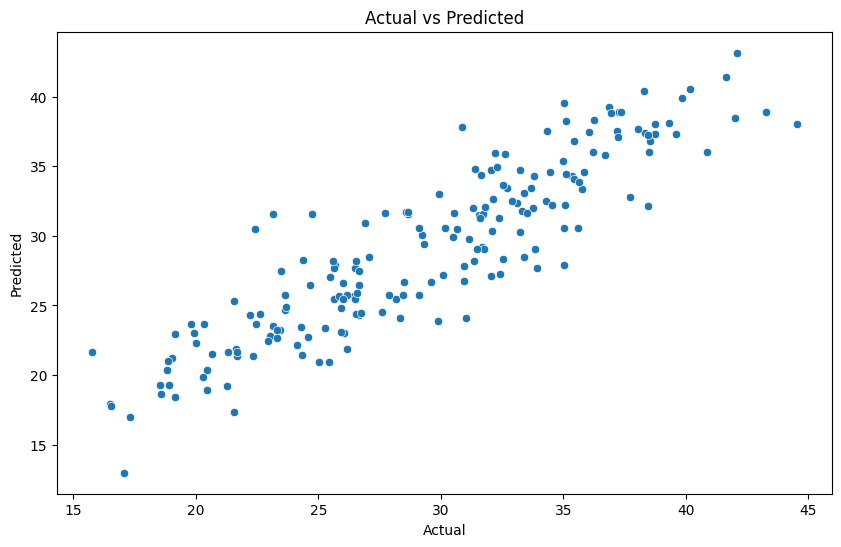

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
new_data=pd.DataFrame({
    "temperature": [18.900466],
    "humidity": [55.126231],
    "wind_speed": [11.186007],
    "appliances": [4],
    "time_of_day": [0],
    "day_of_week": [1]
})

prediction=model.predict(new_data)
print(f"Predicted Energy Consumption: {prediction[0]}")

Predicted Energy Consumption: 22.837731081455463
